In this study, the classification of defects on the steel surface is made. The summary of the study is as follows:

Loading the data set
Collection and visualization of class labels in a single column
Best vector selection of Support Vector Machines and Random Forest classifiers
Presentation of results by confusion matrix and classification report


In [11]:
#Loading Required Libraries

import numpy as np # linear algebra
import pandas as pd # Veri işleme

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
#Machine Learning
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV

#System 
import os
import warnings

warnings.filterwarnings('ignore')
# print(os.listdir("../"))

<b>Evaluation of Data Set</b>
The main purpose to accurately classify the type of surface defects in stainless steel plates with six types of possible defects (plus “other”). The feature vector is composed of 27 features that define approximately the geometric shape and outline of the defect. 

The dataset has 34 properties. The first 27 features include a kind of steel plate error seen in the images.
The last 7 columns are coded classes, that is, if the plate failure is classified as "Stains", it is 1 in that column and 0 in the other columns. So the last 7 classes are the tags of the property vector. The last seven features are as follows:
*Pastry
*z_scratch
*k_scatch
*Stains
*dirtiness
*bumps
*other_faults


In [12]:
#Load data set
dataset_temp=pd.read_csv("faults.csv")
#Summary Information of the data set
dataset_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
X_Minimum                1941 non-null int64
X_Maximum                1941 non-null int64
Y_Minimum                1941 non-null int64
Y_Maximum                1941 non-null int64
Pixels_Areas             1941 non-null int64
X_Perimeter              1941 non-null int64
Y_Perimeter              1941 non-null int64
Sum_of_Luminosity        1941 non-null int64
Minimum_of_Luminosity    1941 non-null int64
Maximum_of_Luminosity    1941 non-null int64
Length_of_Conveyer       1941 non-null int64
TypeOfSteel_A300         1941 non-null int64
TypeOfSteel_A400         1941 non-null int64
Steel_Plate_Thickness    1941 non-null int64
Edges_Index              1941 non-null float64
Empty_Index              1941 non-null float64
Square_Index             1941 non-null float64
Outside_X_Index          1941 non-null float64
Edges_X_Index            1941 non-null float64
Edges_Y_Index            194

Looking at the information above, we can say the following about the data set:
* The data set consists of 1941 samples.
* No missing data
* All data is numeric (dotted number and integer).
* The last seven columns are label columns

In [13]:
#The first five rows of the data set
dataset_temp.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


<b>Collecting defects pillars</b>

The 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps' and 'Other_Faults' columns hold tags, for example. Let's put these label columns under the 'destination' column

In [14]:
#Columns representing the error class
label_columns=dataset_temp.columns.values[-7:]

#Columns representing the defect class are collected under the 'target' column
targets=(dataset_temp.iloc[:,-7:]==1).idxmax(1)

#Columns representing the defect class are extracted from the data set
dataset=dataset_temp.drop(label_columns,axis=1)

#Adding created target class to dataset
dataset['target']=targets
print("The defect columns were collected in one column...")

The defect columns were collected in one column...


<b>Data Set Overview</b>

Information about the characteristics of the data set is useful for machine learning. To do this, we will look at the following information about the data set:
* Size of Data Set
* Several Rows in Data Set
* Statistical Summary of All Features in the Data Set
* Distribution of Class Variable on Data

It is often enough to write a line of code to obtain the above information.

<b>Size of Data Set</b>


* We can find out how many instances (rows) are in the data set and the property (column) numbers of the instances with the shape attribute of the pandas DataFrame object.

In [15]:
dataset.shape

(1941, 28)

There are 1941 examples in the data set and each example has 27 properties (except the output variable).

It is always useful to directly examine the values in the data set. To do this, we will use the head () function of the pandas DataFrame object. The head () function takes the number of rows to be listed as parameters and lists it from the first row. By default, the number of rows to list is 5, head (n = 5)

In [16]:
dataset.head(n=4)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry


<B>Statistical Summary of All Features in the Data Set</B>


The statistical summary of the properties in the data set is defined as Descriptive Statistics. It aims to present the summary and analysis of the descriptive statistical data set by statistical calculations. With the basic calculations used; mean, standard deviation, mode, min, max, title and curvature values are obtained.

We will use the ** describe () ** function of the pandas DataFrame object to obtain descriptive statistical information. ** describe () ** function for numeric (float int) properties; Returns count, unique, top, and freq values for object (string, timestamp) data to count, mean, std, min, max, and percent.

In [17]:
describe=dataset.describe().T

"""
describe function skew and kurtosis values
because we do not add ourselves
"""
describe['skew']=dataset.skew().values
describe['kurtosis']=dataset.kurt().values
describe=round(describe, 2)
describe

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
X_Minimum,1941.0,571.14,520.69,0.00,51.00,435.00,1053.00,1705.00,0.50,-1.15
X_Maximum,1941.0,617.96,497.63,4.00,192.00,467.00,1072.00,1713.00,0.52,-1.08
Y_Minimum,1941.0,1650684.87,1774578.41,6712.00,471253.00,1204128.00,2183073.00,12987661.00,2.81,11.36
Y_Maximum,1941.0,1650738.71,1774590.09,6724.00,471281.00,1204136.00,2183084.00,12987692.00,2.81,11.36
Pixels_Areas,1941.0,1893.88,5168.46,2.00,84.00,174.00,822.00,152655.00,14.08,375.84
X_Perimeter,1941.0,111.86,301.21,2.00,15.00,26.00,84.00,10449.00,21.54,715.96
Y_Perimeter,1941.0,82.97,426.48,1.00,13.00,25.00,83.00,18152.00,39.29,1663.05
Sum_of_Luminosity,1941.0,206312.15,512293.59,250.00,9522.00,19202.00,83011.00,11591414.00,7.73,131.50
Minimum_of_Luminosity,1941.0,84.55,32.13,0.00,63.00,90.00,106.00,203.00,-0.11,0.11
Maximum_of_Luminosity,1941.0,130.19,18.69,37.00,124.00,127.00,140.00,253.00,1.29,7.86


Although the table above provides a summary of the data set, it does not mean much in terms of machine learning. My conclusion from the table is:

* Since the value ranges of the properties are very different from each other, if decision tree based methods are not used, scaling such as SVM, KNN, LR and NN must be performed.

* Skew and kurtosis values indicate that the value distributions of the properties are far from the normal distribution.

The table above contains the descriptive statistical information of all properties that contain numeric values in the data set. Because the 'target' property contains a string value, there is no descriptive statistical information. We also need to obtain the descriptive statistical information of the 'target' attribute.

In [18]:
dataset['target'].describe()

count             1941
unique               7
top       Other_Faults
freq               673
Name: target, dtype: object

<b>Class Distributions</b>

Let's look at the distribution of the output (class, target) variable in the data set.

In [19]:
print(dataset['target'].value_counts())

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: target, dtype: int64


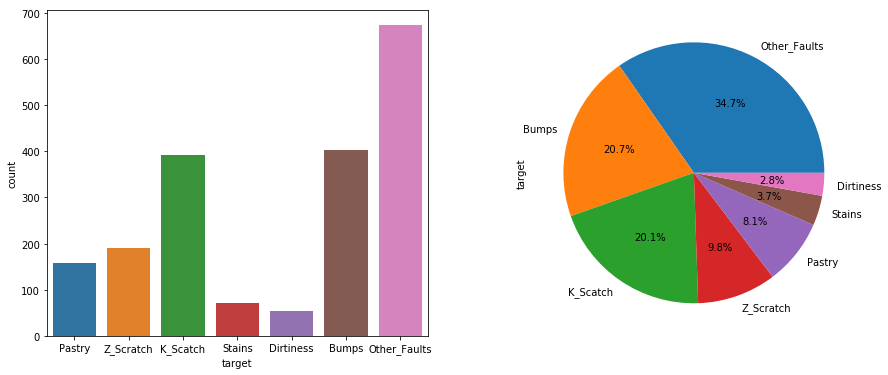

In [20]:
# Graphical representation of sample numbers of classes
fig, ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='target', data=dataset, ax=ax[0])
dataset['target'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

Some classes of data sets that contain more instances than other classes are called unbalanced (** imbalanced **) data sets. When working on unstable data sets, care must be taken to achieve more stable results.

The graphs above show an unstable class distribution. When we separate the data set as training and testing, we need to consider this situation. To do this, we need to set the stratify parameter of train_test_split to stratify = target. In this way, classes will be allocated for training and testing.

<b>Graphical Analysis of Data</b>

In the previous section, we obtained the descriptive statistical summary table of the data set. Although the statistical summary table provides a lot of information about the data set, it is difficult to understand by people who are not familiar with machine learning. Graphical analysis of data allows non-machine learning specialists to interpret data, as well as to better interpret data by experts in machine learning.

The types of graphs that can be used to analyze the data are divided into three types:
* Univariate Distribution Charts
* Two Variable Distribution (Bivariate Distribution) Charts
* Multivariate Distribution Charts

<b>Univariate Distribution Charts</b>
Chart types that can be used for single variable distribution:
* Histogram
* Kernel Density Estimation
* Box Chart (BoxPlot)

**Histogram**

A histogram graph is a type of graph that indicates the frequency (bins) of a range of values. By looking at the histogram graph of a feature, it allows to understand the characteristic of data distribution such as normal (Gaussian), exponential, bimodal, skewed. 


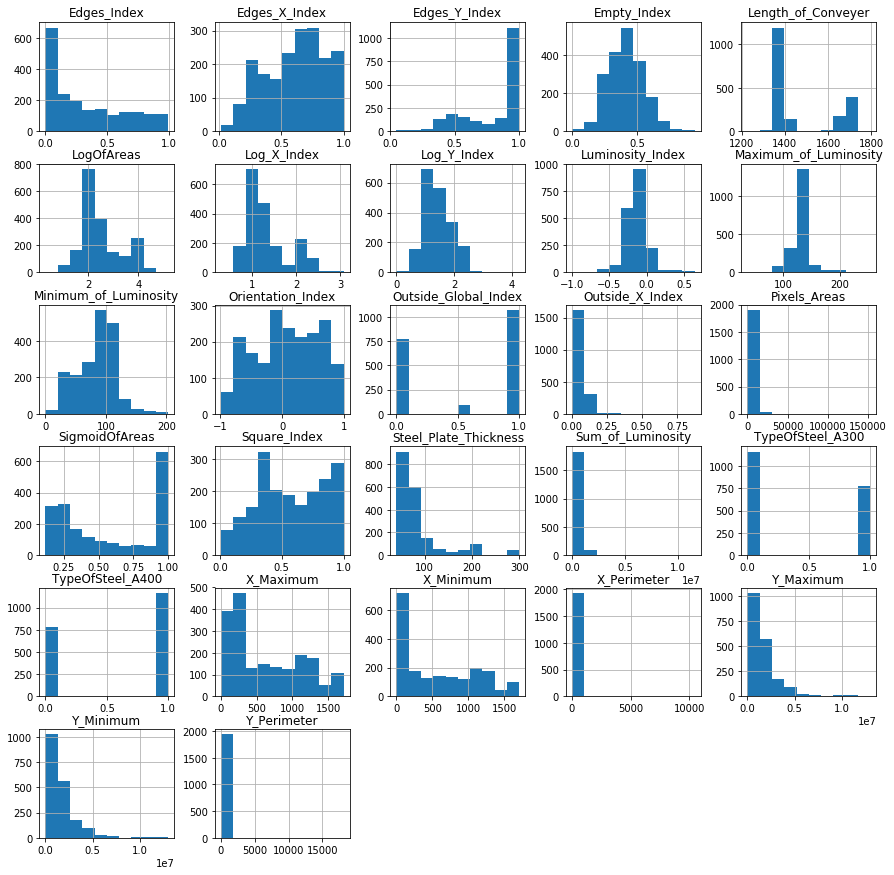

In [21]:
dataset.hist(figsize=(15,15))
plt.show()

Distinctive characteristics according to the histogram groups above:
* ** Normal: ** Empty_Index, Luminosity_Index
* ** Trapezoid: ** Log_X_Index, Log_Y_Index
* ** Exponential: ** 'Edges_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Steel_Plate_Thickness', 'X_Maximum', 'X_Minimum', 'Y_Maximum', 'Y_Minimum',
* ** Bimodal: ** 'Length_of_Conveyer', 'Outside_Global_Index', 'TypeOfSteel_A300', 'TypeOfSteel_A400'

** Kernel Density Estimation **

The KDE graph is the only variable distribution graph showing the given distribution of the property. It is formed by joining the tops of the boxes on the histogram chart with a line. It is more convenient for the human eye to interpret. Like the histogram graph, perhaps it allows you to better understand the normal (Gaussian), exponential, bimodal (skewed) distribution characteristics of the data.

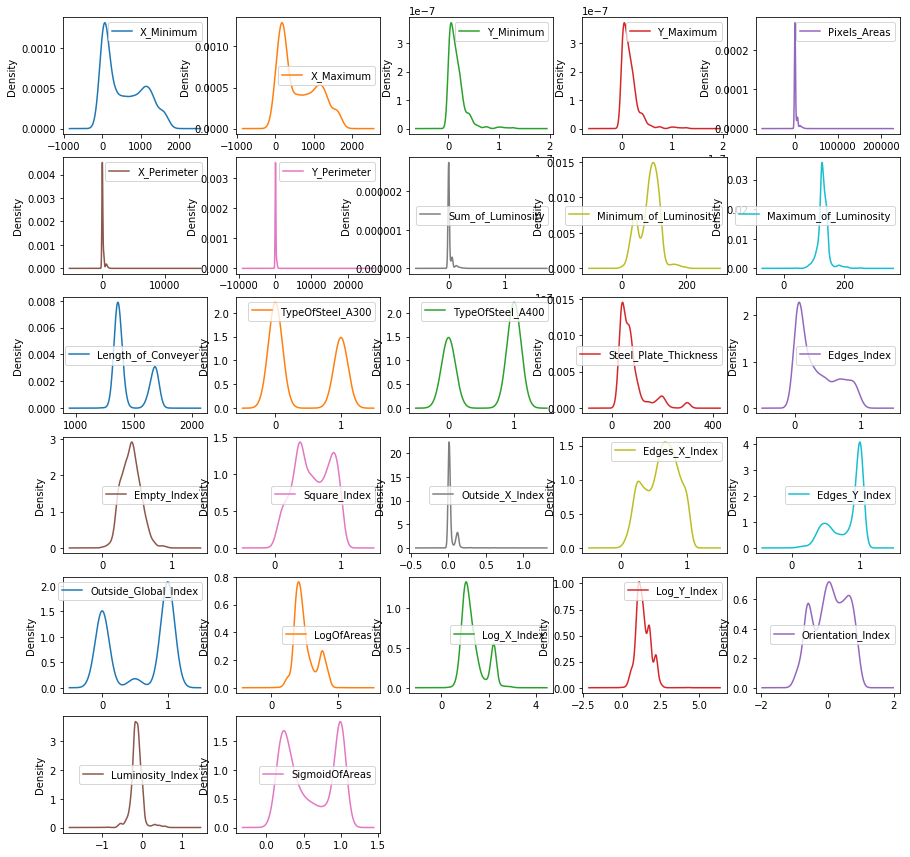

In [22]:
dataset.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

In the above density graphs, the distribution type can be seen more clearly than the histogram graphs. Especially bimodal distributions are more obvious.

** Box Plot Chart **

Box chart is another type of chart that can be used for single variable distribution. The box graph summarizes the statistical distribution of each feature, draws a line for the median, and represents the values between the 25th and 75th percentiles with the box (50% of the data). With T-drawings (called Mustache) drawn from the top and bottom of the box, it gives insight into the spread of data and points outside the mustaches indicate outliers (values 1.5 times larger than the spread size of 50% of the data are considered outliers).

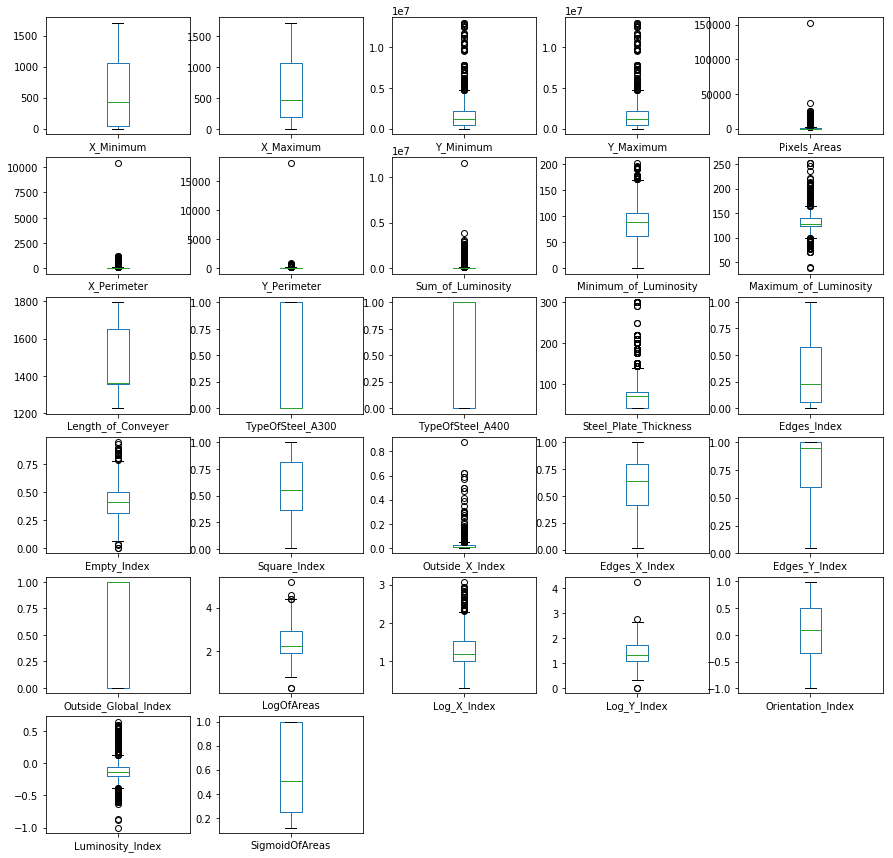

In [23]:
dataset.plot(kind='box', layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15) )
plt.show()

In the box graphs above, Y_Minimum, Y_Maximimum, Maximum_Luminosity, and so on. contrary to the characteristics are clearly seen.

<b>Bivariate Distribution Charts</b>
We can interpret their contribution to the machine learning model by looking at the distribution between the target variable and properties.

In [24]:
#Different graphs showing the relationship between classes and properties;
#boxplot, violinplot, pointplot, barplot
def draw_bivariate_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0
    for i in range(rows):
        for j in range(cols):
            if column_names[counter]=='target':
                break
            if 'violin' in plot_type:
                sns.violinplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='target',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='target',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

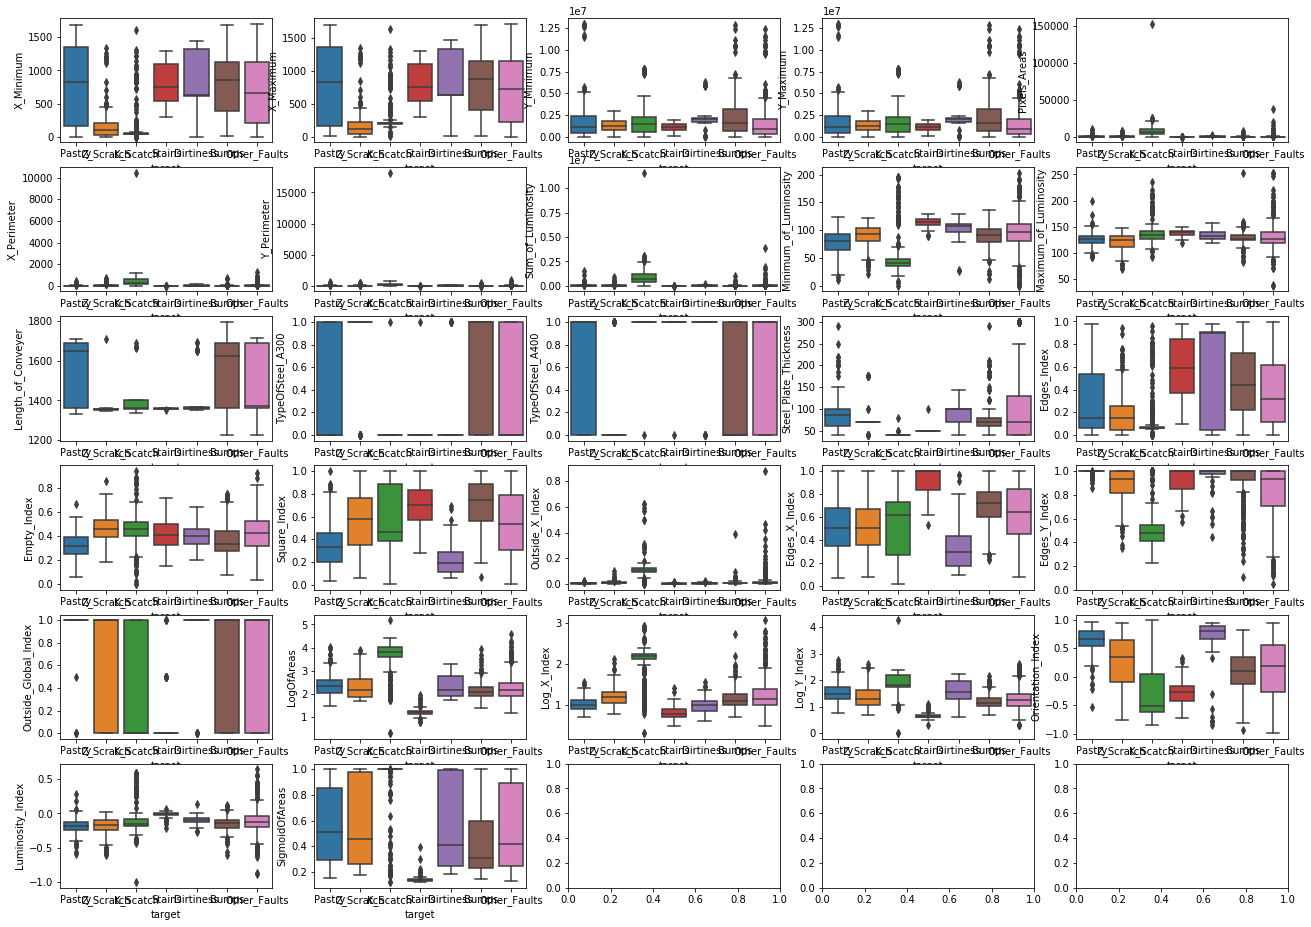

In [25]:
draw_bivariate_plot(dataset=dataset, rows=6, cols=5,plot_type="box")

The graphic above seems cramped due to space constraints. Let's select the best features and visualize them again.

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()
X=dataset.drop('target',axis=1)
Y=le.fit_transform(dataset['target'])

In [28]:
kbest=SelectKBest(score_func=f_classif, k=6)
kbest.fit(X,Y)

SelectKBest(k=6, score_func=<function f_classif at 0x1a24345048>)

In [29]:
k_best=kbest.get_support(indices=True)
feature_names=dataset.columns.values
k_best_feature_names=feature_names[k_best]
k_best_feature_names =np.append(k_best_feature_names,"target")

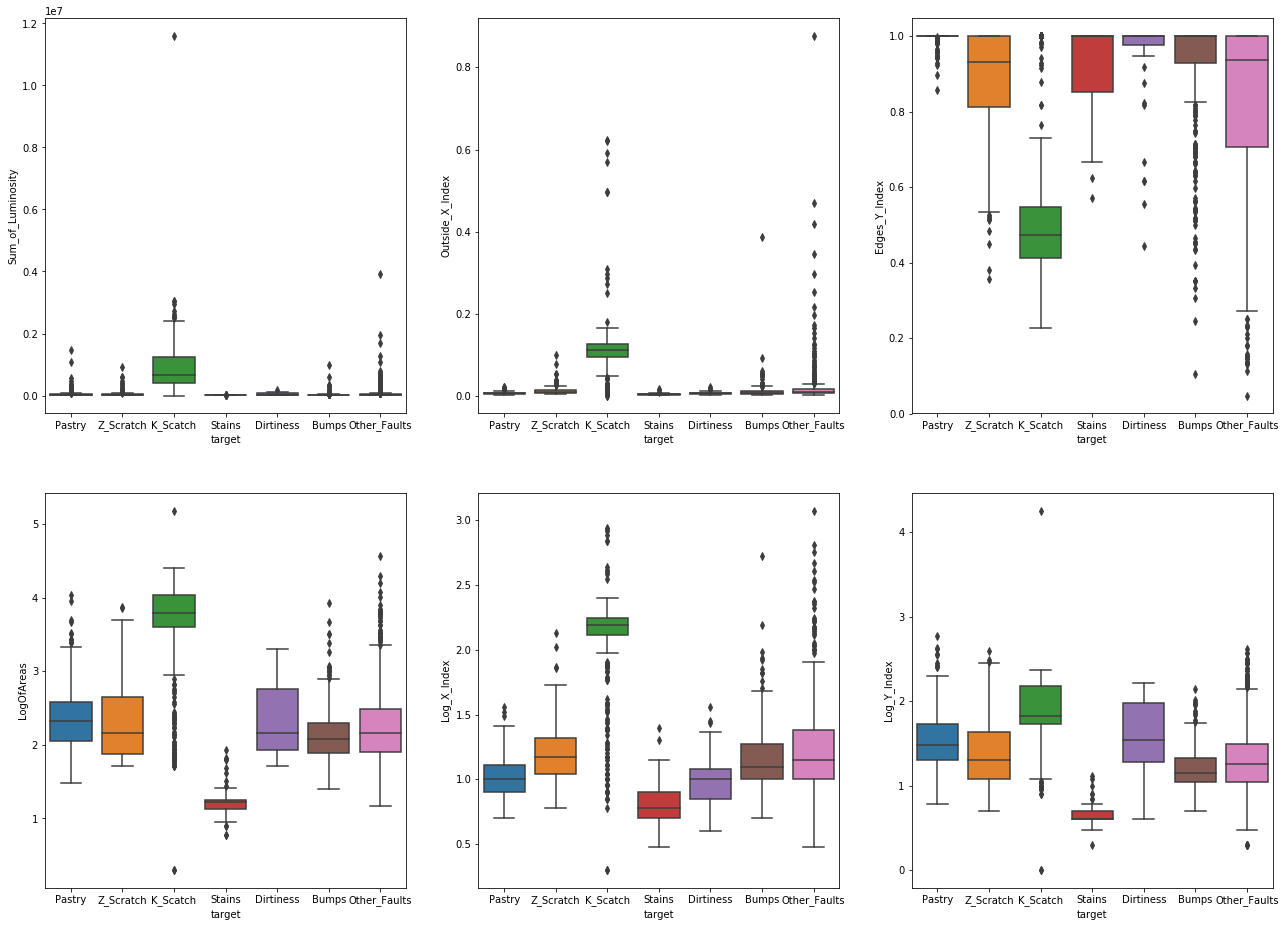

In [30]:
draw_bivariate_plot(dataset=dataset[k_best_feature_names], 
                    rows=2, cols=3,plot_type="box")

<b>Auxiliary Functions</b>

**draw_confusion_matrix** function will be used to plot the confusion matrix

**MyGridSearch** function will be used to find the best performing parameters of classifiers

In [31]:
#Drawing of confusion matrix
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d") 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [32]:
def get_train_test(dataset):
#The data set used is optimized for the machine learning model x:argument y:dependent variable
    X=dataset.drop('target', axis=1)
    y=dataset['target']
    
#The properties in the data set have different value ranges scaling required
    standardScaler=StandardScaler()
    X=standardScaler.fit_transform(X)
    
# Dividing data set into training and testing
#The model will be trained using the training data set
#Test data set will be tested by trained data set
    X_train,X_test,y_train,y_test = train_test_split(X,#data matrix
                                                     y,# output vector
                                                     stratify=y,# Class rates are taken into account
                                                     test_size = 0.3,# 70% training, 30% testing
                                                     random_state = 42)
    return X_train,X_test,y_train,y_test

In [33]:
 #Getting training and test sections
X_train,X_test,y_train,y_test=get_train_test(dataset)

In [36]:
# def MyGridSearch(clf, param_grid, dataset):
    
#     print("classifier:",clf.__class__.__name__)
    
#     #Getting training and test sections
#   #  X_train,X_test,y_train,y_test=get_train_test(dataset)
    
#     #Cross validation with GridSearchCV
#     #The training data set is divided into five (cv = 5) parts to achieve success rates for each.
#     grid_search=GridSearchCV(clf, param_grid, cv=5)
    
#     #Training is provided for each of the training sets divided into five separate sections
#     grid_search.fit(X_train, y_train)

#     #The result of the test data set is obtained according to the best of the waist separate success rate.
#     accuracy=grid_search.score(X_test,y_test)
    
#     #Test printed success rate
#     print("Success rate:",accuracy)
#     #The parameters used for testing are printed
#     print("grid_search.best_params_:",grid_search.best_params_)
    
#     # All test data for confusion matrix and classification report Performing predictions
#     y_pred=grid_search.predict(X_test)
    
#     cm = confusion_matrix(y_test,y_pred)
#     draw_confusion_matrix(cm)
#     print('Classification Report: \n',classification_report(y_test,y_pred))
#     pickle.dump(grid_search, open("final_prediction.pickle","wb"))

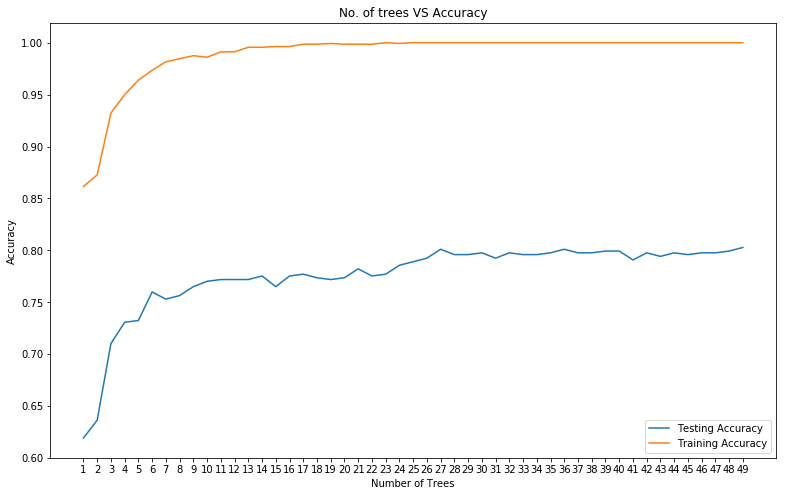

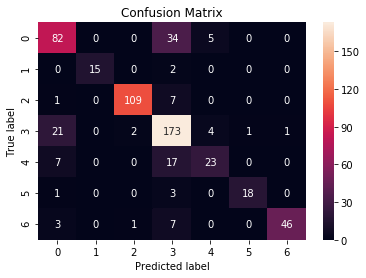

Classification report: 
               precision    recall  f1-score   support

       Bumps       0.71      0.68      0.69       121
   Dirtiness       1.00      0.88      0.94        17
    K_Scatch       0.97      0.93      0.95       117
Other_Faults       0.71      0.86      0.78       202
      Pastry       0.72      0.49      0.58        47
      Stains       0.95      0.82      0.88        22
   Z_Scratch       0.98      0.81      0.88        57

    accuracy                           0.80       583
   macro avg       0.86      0.78      0.82       583
weighted avg       0.81      0.80      0.80       583

Best accuracy is 0.8027444253859348 with No. of trees = 49


In [44]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = get_train_test(dataset)#train_test_split(x,y,stratify=y,test_size = 0.3,random_state = 8)
trees = np.arange(1, 50)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(trees):
    # k from 1 to 27(exclude)
    rf = RandomForestClassifier(random_state = 8, n_estimators=k, min_samples_split=2)
    # Fit with rf
    rf.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(rf.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(rf.score(X_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(trees, test_accuracy, label = 'Testing Accuracy')
plt.plot(trees, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('No. of trees VS Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(trees)
plt.show()

rf = RandomForestClassifier(random_state = 8, n_estimators=48, min_samples_split=2)
y_pred = rf.fit(X_train,y_train).predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

pickle.dump(rf, open("final_prediction.pickle","wb"))
print('Classification report: \n',classification_report(y_test,y_pred))
print("Best accuracy is {} with No. of trees = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# <b>SVC Results</b>

In [45]:
# svc_param_grid={'C':[0.001,0.01,0.1, 1, 10, 100],
#            'gamma':[0.001,0.01,0.1, 1, 10, 100],
#                'kernel':['linear', 'rbf']}
#This process can take up to a few minutes. If you want, you can try the fork (Fork).
#Best parameters obtained; {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
#MyGridSearch (SVC (), svc_param_grid, dataset)

In [46]:

# svc_best_params={'C':[ 10],
#            'gamma':[0.1],
#             'kernel':['rbf']}
# MyGridSearch(SVC(), svc_best_params, dataset )

# <b>RandomForestClassifier Results</b>

In [47]:
# random_forest_param_grid = {"max_depth": [3, None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "min_samples_leaf": [1, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}
# #This process can take up to five minutes.
# #Best parameters obtained;
# # {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
# #MyGridSearch(RandomForestClassifier(n_estimators=48), random_forest_param_grid, dataset )

In [48]:
# rfc_best_params={'n_estimators':[48],
#     'bootstrap': [False], 
#              'criterion': ['entropy'], 
#              'max_depth': [None], 
#              'max_features': [10], 
#              'min_samples_leaf': [1], 
#              'min_samples_split': [2]}
# MyGridSearch(RandomForestClassifier(), rfc_best_params, dataset )

# Model Serialization/Marshelling

In [49]:
model = pickle.load(open("final_prediction.pickle", "rb"))
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=48,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [54]:
#print(classification_report(y_test, model.predict(X_test)))
print('Classification report: \n',classification_report(y_test,model.predict(X_test)))

Classification report: 
               precision    recall  f1-score   support

       Bumps       0.71      0.68      0.69       121
   Dirtiness       1.00      0.88      0.94        17
    K_Scatch       0.97      0.93      0.95       117
Other_Faults       0.71      0.86      0.78       202
      Pastry       0.72      0.49      0.58        47
      Stains       0.95      0.82      0.88        22
   Z_Scratch       0.98      0.81      0.88        57

    accuracy                           0.80       583
   macro avg       0.86      0.78      0.82       583
weighted avg       0.81      0.80      0.80       583



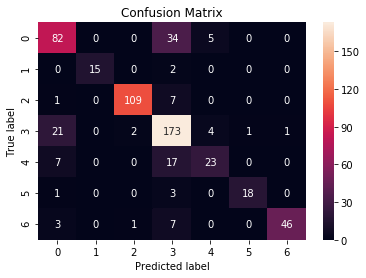

In [53]:
cm = confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d") 
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Request from API

In [64]:
import requests
import json

url = 'http://0.0.0.0:5000/api/'

#data = [[42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,1.1818,0.0047,0.4706,1,1,2.4265,0.9031,1.6435,0.8182,0.2913,0.5822]]
#data = [[1087,1103,3814057,3814076,194,28,23,22254,101,132,1364,1,0,80,0.3827,0.3618,0.8421,0.0117,0.5714,0.8261,1,2.2878,1.2041,1.2787,0.1579,-0.1038,0.5029]]
#Bump
data=[[38,49,735612,735624,113,11,12,12652,93,130,1707,1,0,100,0.0445,0.1439,0.9167,0.0064,1,1,1,2.0531,1.0414,1.0792,0.0833,-0.1253,0.2432]]
#dirtness data
#data = [[0,0,0,0,0,29,31,0,79,124,1353,0,1,120,0.0207,1,0.4516,0.0104,0.4828,1,1,5,1.1461,1.4914,1,-0.2476,0.7065]]
j_data = json.dumps(data)
headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}
r = requests.post(url, data=j_data, headers=headers)
print(r, r.text)


<Response [200]> {
  "results": "['Other_Faults']"
}


# <b>Dimension Reduction with Unsupervised Learning: Principal Component Analysis</b>

In [28]:
from sklearn.decomposition import PCA

In [29]:
 X_train,X_test,y_train,y_test=get_train_test(dataset)

In [30]:
pca=PCA(whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

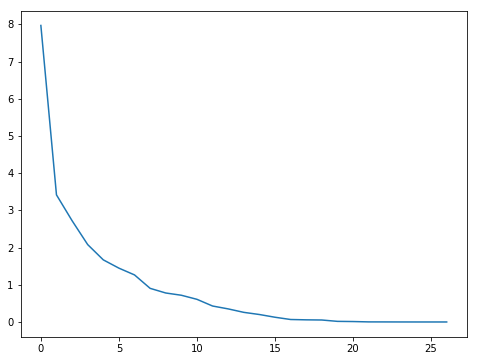

In [31]:
plt.figure(figsize=(8,6))
plt.plot(pca.explained_variance_)

The graph above 15 illustrates that the principal component can represent the property verifier. Let PCA transform according to 15 basic components

In [32]:
pca=PCA(n_components=15)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
print("PCA conversion performed")

PCA conversion performed


In [33]:
clf=SVC()
clf.fit(X_train_pca, y_train)
y_pred=clf.predict(X_test_pca)
print("Estimated on PCA transformed data set")

Estimated on PCA transformed data set


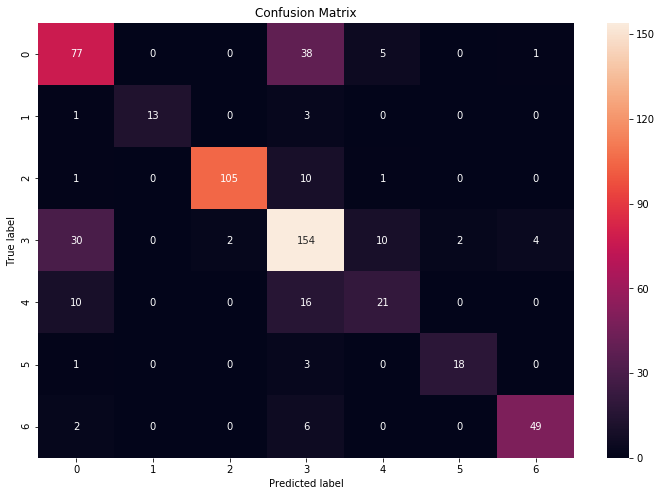

Success rate:  0.749571
Classification Report: 
               precision    recall  f1-score   support

       Bumps       0.63      0.64      0.63       121
   Dirtiness       1.00      0.76      0.87        17
    K_Scatch       0.98      0.90      0.94       117
Other_Faults       0.67      0.76      0.71       202
      Pastry       0.57      0.45      0.50        47
      Stains       0.90      0.82      0.86        22
   Z_Scratch       0.91      0.86      0.88        57

   micro avg       0.75      0.75      0.75       583
   macro avg       0.81      0.74      0.77       583
weighted avg       0.76      0.75      0.75       583



In [34]:
cm = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm)
print("Success rate: {: 2f}".format(clf.score(X_test_pca,y_test)))
print('Classification Report: \n',classification_report(y_test,y_pred))

<b>Automating Workflow</b>

sklearn introduces the Pipeline object to automate the standard workflow of machine learning applications. Using the pipeline, preprocessing, feature extraction, size reduction, and classification operations can be controlled with a single object.

Pipeline helps ensure consistent machine learning performance by guaranteeing the same operations in training and test data.

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)
print("The model was trained and predicted ...")

NameError: name 'pipeline' is not defined

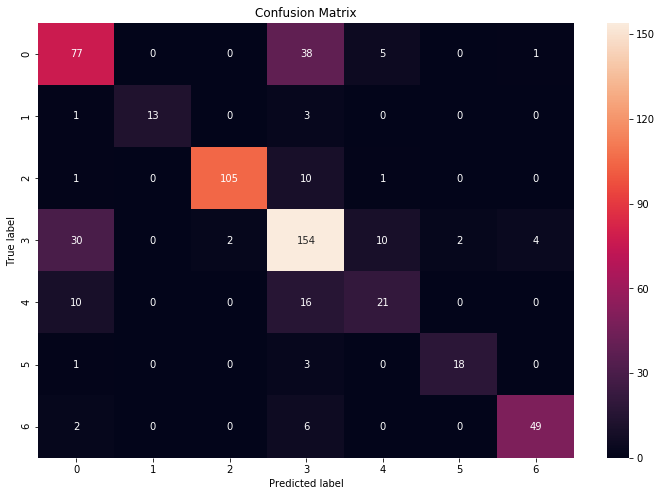

NameError: name 'pipeline' is not defined

In [40]:
cm = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm)
print("Success rate:{:.2f}".format(pipeline.score(X_test,y_test)))
print('Classification Report: \n',classification_report(y_test,y_pred))

In [44]:
app = Flask(_name_)

NameError: name 'Flask' is not defined

NameError: name 'route' is not defined